# Комплексное задание по A/B тестированию

### Задача: Необходимо проанализировать итоги эксперимента и на его основе сделать вывод о том, что, стоит ли запускать новую механику оплаты на всех пользователей


### Необходимо ответить на следующие вопросы:
####   1)На какие метрики Вы смотрите в ходе анализа и почему?
####    2)Имеются ли различия в показателях и с чем они могут быть связаны?
####    3)Являются ли эти различия статистически значимыми?
####    4)Стоит ли запускать новую механику на всех пользователей?

In [ ]:
import pandas as pd
from IPython.display import display, HTML, display_html
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pingouin as pg
import scipy.stats as stats
from scipy import stats
%matplotlib inline

In [ ]:
groups = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-d-martynov/lesson_1_DM/FINAL_PROJECT/Проект_2_groups.csv', sep=';')
group_add = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-d-martynov/lesson_1_DM/FINAL_PROJECT/Проект_2_group_add.csv')
active_studs = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-d-martynov/lesson_1_DM/FINAL_PROJECT/Проект_2_active_studs.csv')
checks = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-d-martynov/lesson_1_DM/FINAL_PROJECT/Проект_2_checks.csv', sep=';')

## Памятка: Если у вас смазались графики, то на них необходимо нажать

In [ ]:
CSS = """
.output {
    flex-direction: row;
}
"""

HTML('<style>{}</style>'.format(CSS))

### Проводим EDA

###### Привожу id-шники к одному виду.

In [ ]:
active_studs = active_studs.rename(columns={'student_id':'id'})

/opt/tljh/user/lib/python3.7/site-packages/outdated/utils.py:18: OutdatedCacheFailedWarning: Failed to use cache while checking for outdated package.
Set the environment variable OUTDATED_RAISE_EXCEPTION=1 for a full traceback.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  **kwargs
/opt/tljh/user/lib/python3.7/site-packages/outdated/utils.py:18: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.4.0, the latest is 0.5.3.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  **kwargs


In [ ]:
checks =  checks.rename(columns={'student_id':'id'})

In [ ]:
display(groups, group_add, active_studs, checks)

,id,grp
0,1489,B
1,1627,A
2,1768,B
3,1783,B
4,1794,A
...,...,...
74479,5692459,B
74480,5692572,B
74481,5692865,B
74482,5693667,B


,id,grp
0,5694584,B
1,5694830,B
2,5695057,B
3,5698872,B
4,5699067,B
...,...,...
87,200247820,B
88,201032527,B
89,201067612,B
90,201067653,B


/opt/tljh/user/lib/python3.7/site-packages/outdated/utils.py:18: OutdatedCacheFailedWarning: Failed to use cache while checking for outdated package.
Set the environment variable OUTDATED_RAISE_EXCEPTION=1 for a full traceback.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  **kwargs
/opt/tljh/user/lib/python3.7/site-packages/outdated/utils.py:18: OutdatedPackageWarning: The package outdated is out of date. Your version is 0.2.1, the latest is 0.2.2.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  **kwargs


,id
0,581585
1,5723133
2,3276743
3,4238589
4,4475369
...,...
8336,1794344
8337,296883
8338,3598448
8339,3610547


,id,rev
0,1627,990.0
1,3185,690.0
2,25973,690.0
3,26280,690.0
4,100300,990.0
...,...,...
536,5645737,1900.0
537,5651566,1900.0
538,5662322,1900.0
539,5681918,1900.0


###### Видим, что нет повторений среди id

In [ ]:
display(groups['id'].nunique(), group_add['id'].nunique(), active_studs['id'].nunique(), checks['id'].nunique())

74484

92

8341

541

###### Смотрим типы данных

In [ ]:
display(pd.DataFrame(groups.dtypes), pd.DataFrame(group_add.dtypes),
        pd.DataFrame(active_studs.dtypes), pd.DataFrame(checks.dtypes))

,0
id,int64
grp,object


,0
id,int64
grp,object


,0
id,int64


,0
id,int64
rev,float64


###### Видим, что нет недостающих значений нет

In [ ]:
display(pd.DataFrame(groups.isna().any()), pd.DataFrame(group_add.isna().any()),
        pd.DataFrame(active_studs.isna().any()), pd.DataFrame(checks.isna().any()))

,0
id,False
grp,False


,0
id,False
grp,False


,0
id,False


,0
id,False
rev,False


## Подготовка данных

In [ ]:
display(groups, group_add, active_studs, checks)

,id,grp
0,1489,B
1,1627,A
2,1768,B
3,1783,B
4,1794,A
...,...,...
74479,5692459,B
74480,5692572,B
74481,5692865,B
74482,5693667,B


,id,grp
0,5694584,B
1,5694830,B
2,5695057,B
3,5698872,B
4,5699067,B
...,...,...
87,200247820,B
88,201032527,B
89,201067612,B
90,201067653,B


,id
0,581585
1,5723133
2,3276743
3,4238589
4,4475369
...,...
8336,1794344
8337,296883
8338,3598448
8339,3610547


,id,rev
0,1627,990.0
1,3185,690.0
2,25973,690.0
3,26280,690.0
4,100300,990.0
...,...,...
536,5645737,1900.0
537,5651566,1900.0
538,5662322,1900.0
539,5681918,1900.0


###### Если файл group_add является дополнительным, то "приклею" его к основному

In [ ]:
full_group = pd.concat([groups, group_add])
full_group.shape[0]

74576

###### Проверяю, сколько id содержаться в full_group

In [ ]:
np.isin(active_studs, full_group['id']).sum() # Как мы можем видеть, что все id из active_studs находятся в full_group

8341

###### Объединяю в один ДФ

In [ ]:
full_group['active_user'] = np.isin(full_group['id'], active_studs)

In [ ]:
# Необходимо присоединить доход к основному ДФ
full_df = pd.merge(full_group, checks, on='id', how='left')
full_df['rev'] = full_df['rev'].fillna(0) # Заменил NaN нулями

In [ ]:
full_df

,id,grp,active_user,rev
0,1489,B,False,0.0
1,1627,A,True,990.0
2,1768,B,False,0.0
3,1783,B,False,0.0
4,1794,A,False,0.0
...,...,...,...,...
74571,200247820,B,False,0.0
74572,201032527,B,False,0.0
74573,201067612,B,False,0.0
74574,201067653,B,False,0.0


###  Кол-во пользователей, кто не вошел в приложение, но купил продукт

In [ ]:
full_df.query('active_user == False & rev > 0').id.count()
# Скорее всего что:
# до эксперимента пользователи купили товар, а их транзакция дошла только во время проведения эксперимента

149

####  Меняю статус пользователей

In [ ]:
full_df['active_user'] = np.where(full_df['rev'] > 0,
                                 True, full_df.active_user)

## 1 Вопрос. Метрики

#### Думаю, что можно выделить такие метрики:
#####    1)Средний чек
#####     2)Конверсия в покупку (купил/не купил)
#####     3)ARPU
#####     4)ARPPU

### Средний чек на активного пользователя

##### Почему активного? Потому что меня интересуют пользователи, которые участвуют в эксперементе

In [ ]:
full_df.head()

,id,grp,active_user,rev
0,1489,B,False,0.0
1,1627,A,True,990.0
2,1768,B,False,0.0
3,1783,B,False,0.0
4,1794,A,False,0.0


In [ ]:
avg_values = full_df.query('rev > 0').groupby('grp',as_index=False).agg({'rev':'mean'}). \
    rename(columns={'rev':'avg'})
avg_values

,grp,avg
0,A,860.710280
1,B,1108.824893


### Конверсия в покупку

###### Нам нужно найти количество платящих user-ов и далее поделить на всех тех кто был активен в приложении

In [ ]:
target_action = full_df.query('rev > 0').groupby('grp', as_index=False)[['id']].count()

target_action

,grp,id
0,A,107
1,B,434


In [ ]:
pool_users = full_df.query('active_user == True')['id'].count()
pool_users

8490

In [ ]:
conversion = ((target_action[['id']] / pool_users) * 100).rename(columns={'id':'conversion'},) \
    .set_index(target_action['grp']).reset_index()
conversion

,grp,conversion
0,A,1.260306
1,B,5.111896


In [ ]:
for i in conversion.conversion:
    print(f'{round(i,2)} %')

1.26 %
5.11 %


### ARPU

###### Доход в каждой группе  / Число активных пользователей

In [ ]:
arpu_sum_rev_grp = full_df.query('active_user == True') \
    .groupby('grp',as_index=False).agg({'id':'count', 'rev':'sum'}) \
    .rename(columns={'id':'num_users'}).round()
arpu_sum_rev_grp

,grp,num_users,rev
0,A,1567,92096.0
1,B,6923,481230.0


In [ ]:
arpu_sum_rev_grp['ARPU'] = round(arpu_sum_rev_grp['rev'] / arpu_sum_rev_grp['num_users'],1)
ARPU = arpu_sum_rev_grp[['grp', 'ARPU']]
ARPU

,grp,ARPU
0,A,58.8
1,B,69.5


## Вопрос 2. Различия в показателях

###### Теперь давайте посмотрим на все показатели

In [ ]:
def display_side_by_side(dfs:list, captions:list):
    output = ""
    combined = dict(zip(captions, dfs))
    for caption, df in combined.items():
        output += df.style.set_table_attributes("style='display:inline'").set_caption(caption)._repr_html_()
        output += "\xa0\xa0\xa0"
    display(HTML(output))

In [ ]:
amount_active_users = full_df.query('active_user == True').groupby('grp', as_index=False)[['id']].count()

In [ ]:
display_side_by_side([conversion, avg_values, arpu_sum_rev_grp, amount_active_users],
                     ['conversion', 'avg_values', 'ARPU', 'amount_active_users'])

## ----------------------------------------------------------------------------------------------------------------------------------

## Вопрос 3. Доказательство статистически значимых различий и проведение a/b тестов

###### Делю на тестовую и контрольные группы на всех активных пользователей

In [ ]:
control_users = full_df.query('active_user == True & grp == "A"')

In [ ]:
test_users = full_df.query('active_user == True & grp == "B"')

In [ ]:
display(control_users, test_users)

,id,grp,active_user,rev
1,1627,A,True,990.0
43,3391,A,True,0.0
331,109623,A,True,0.0
406,114366,A,True,690.0
614,133678,A,True,0.0
...,...,...,...,...
74416,5668989,A,True,0.0
74469,5690284,A,True,0.0
74523,5723133,A,True,0.0
74528,5729371,A,True,0.0


,id,grp,active_user,rev
10,2085,B,True,0.0
12,2215,B,True,0.0
39,3185,B,True,690.0
45,3401,B,True,0.0
112,22994,B,True,0.0
...,...,...,...,...
74539,5740903,B,True,1900.0
74543,5760471,B,True,0.0
74545,5777081,B,True,0.0
74561,5945085,B,True,0.0


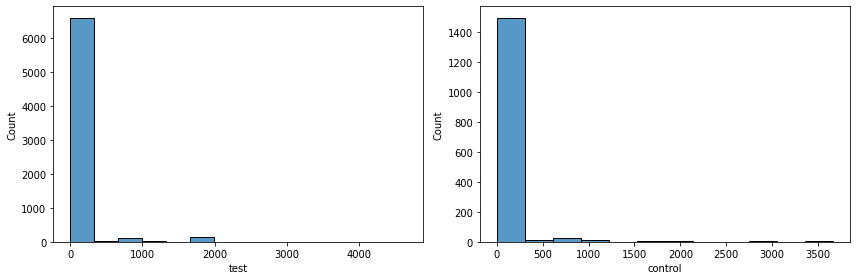

In [ ]:
plt.subplot(1, 2, 1)
sns.histplot(test_users['rev'])
plt.xlabel('test')

plt.subplot(1, 2, 2)
sns.histplot(control_users['rev'])
plt.xlabel('control')
plt.tight_layout(rect=(0,0,2,1)) # Как мы можем видеть, что распределения не похожи на нормальные

##### Давайте удостоверимся и построим qqplot

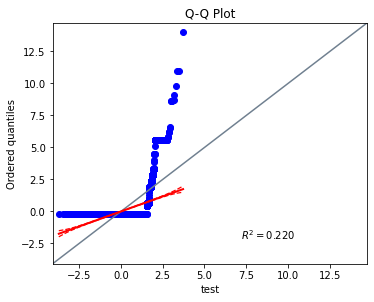

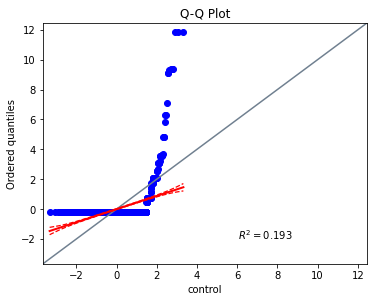

In [ ]:
pg.qqplot(test_users['rev'])
plt.xlabel('test')
plt.tight_layout(pad=0)
pg.qqplot(control_users['rev'])
plt.xlabel('control')
plt.tight_layout(pad=0) # Здесь мы можем уже удостовериться

###### Как мы можем наблюдать, что распределение дохода на всех активных пользователей далеко ненормальное
###### Это и верно, так как у нас много пользователей, а клиентов на порядок меньше

# ---------------------------------------------------------------------------------------------------------------

###### Что ж, давайте теперь посмотрим все тоже самое, только для клиентов

In [ ]:
control_client = full_df.query('active_user == True & grp == "A" & rev > 0')

In [ ]:
test_client = full_df.query('active_user == True & grp == "B" & rev > 0')

In [ ]:
display(control_client, test_client)

,id,grp,active_user,rev
1,1627,A,True,990.0
406,114366,A,True,690.0
2041,212994,A,True,690.0
2231,218393,A,True,690.0
2393,225541,A,True,690.0
...,...,...,...,...
73140,5394575,A,True,990.0
73966,5545563,A,True,1160.0
74022,5557468,A,True,290.0
74079,5567520,A,True,489.0


,id,grp,active_user,rev
39,3185,B,True,690.0
121,25973,B,True,690.0
125,26280,B,True,690.0
220,100300,B,True,990.0
223,100645,B,True,630.0
...,...,...,...,...
74365,5645737,B,True,1900.0
74381,5651566,B,True,1900.0
74402,5662322,B,True,1900.0
74452,5681918,B,True,1900.0


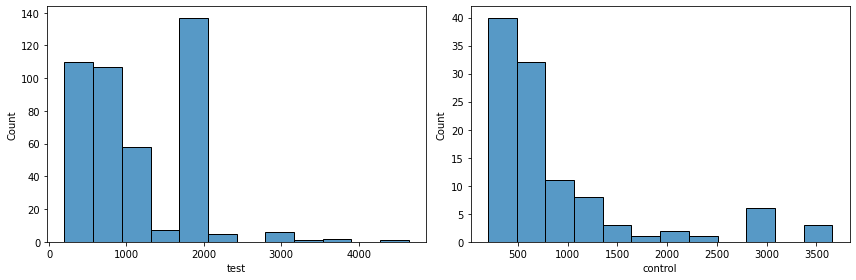

In [ ]:
plt.subplot(1, 2, 1)
sns.histplot(test_client['rev'])
plt.xlabel('test')

plt.subplot(1, 2, 2)
sns.histplot(control_client['rev'])
plt.xlabel('control')
plt.tight_layout(rect=(0,0,2,1)) # И да, мы видим улучшения в распределении, но оно все еще далеко от нормального

###### Давайте прологарифмируем, с целью приблизить распределение к нормальному

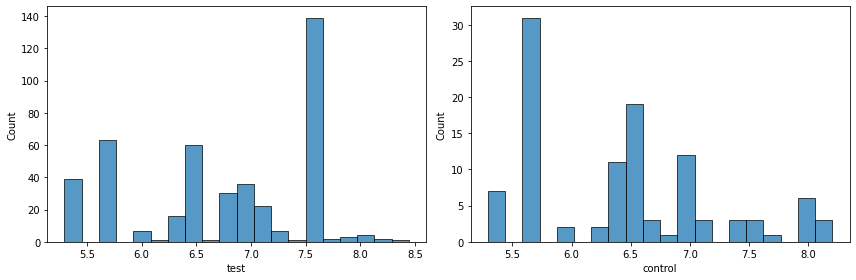

In [ ]:
plt.subplot(1, 2, 1)
sns.histplot(np.log(test_client['rev']), bins=20)
plt.xlabel('test')

plt.subplot(1, 2, 2)
sns.histplot(np.log(control_client['rev']), bins=20)
plt.xlabel('control')
plt.tight_layout(rect=(0,0,2,1)) # Даже после логарифмирования наше распределение не похоже на норальное

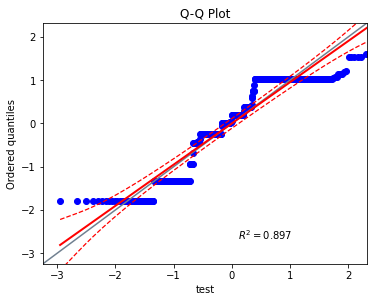

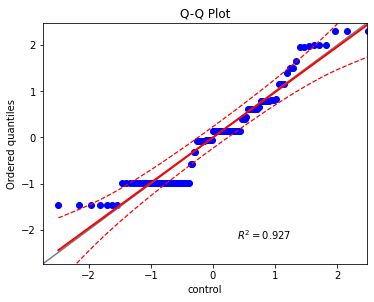

In [ ]:
pg.qqplot(np.log(test_client['rev']))
plt.xlabel('test')
plt.tight_layout(pad=0)
pg.qqplot(np.log(control_client['rev']))
plt.xlabel('control')
plt.tight_layout(pad=0) # Тоже нет

## ----------------------------------------------------------------------------------------------------------------------------------

# a/b тесты

## Средний чек

##### Построим график распределения среднего чека платящего пользователя

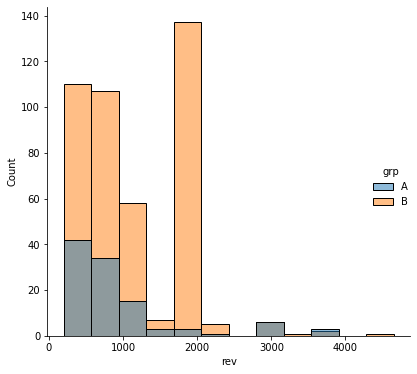

In [ ]:
sns.displot(data=full_df.query('rev > 0'), x='rev', hue='grp')
plt.tight_layout(pad=0)

Видим, что распределение ненормальное

In [ ]:
full_df.query('rev > 0').groupby('grp').agg({'rev':'mean'})

,rev
grp,
A,860.710280
B,1108.824893


In [ ]:
full_df.query('rev > 0 & grp == "B"' )['rev'].mean()

1108.8248930875575

### Гипотезы:
####  H0: Средний чек не различается в двух группах
####  H1:Средний чек  различаются в двух группах

Вместо классических тестов, мы будем использовать bootstrap, т.к. он не придирчив к отсуствию выполнения некоторых стат. допущений
(например: у нас все метрики ненормально распределены)

Но, t-test может закрыть глаза на ненормальное распределение, если объем выборки небольшой. А у нас как раз небольшой объем выборки!

### Bootstrap

#### При проведении bootstrap мы видим что различия статзначимы

In [ ]:
pg.compute_bootci(full_df.query('rev > 0 & grp == "A"' )['rev'], func='mean')

array([ 716.62, 1020.42])

In [ ]:
pg.compute_bootci(full_df.query('rev > 0 & grp == "B"' )['rev'], func='mean')

array([1042.58, 1179.24])

### T-test

#### Проведя Т-тест мы можем наблюдать что результаты статзначимы, но распределение далеко не нормальное


In [ ]:
pg.ttest(full_df.query('rev > 0 & grp == "A"' )['rev'], full_df.query('rev > 0 & grp == "B"' )['rev'])

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-2.867019,152.06622,two-sided,0.004732,"[-419.09, -77.14]",0.327773,6.039,0.858002


#### Даже после логарифмирования, результат не сильно изменился

In [ ]:
pg.ttest(np.log(full_df.query('rev > 0 & grp == "A"' )['rev']), np.log(full_df.query('rev > 0 & grp == "B"' )['rev']))

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-3.602752,166.346707,two-sided,0.000416,"[-0.47, -0.14]",0.381196,57.57,0.941263


Как итог, можем наблюдать что средние в двух группах различаются

## ARPU

### Гипотезы:
####  H0: ARPU не различается в двух группах
####  H1: ARPU   различаются в двух группах

Также проведем здесь T-test

#### Проведя Т-тест мы можем наблюдать что результаты не статзначимы

In [ ]:
pg.ttest(full_df.query('active_user == True')['rev'], full_df.query('active_user == True')['rev'])

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,0.0,16978,two-sided,1.0,"[-9.7, 9.7]",0.0,0.017,0.05


Отклоняем альтернативную гипотезу H1: ARPU различаются в двух группах

## CR

### Гипотезы:
####  H0: Взаимосвязи между Статусом и Группой нет
####  H1: Взаимосвязь между Статусом и Группой присутвует

Будем использовать хи-квадрат, так как конверсия это категориальная переменная: перешел в покупку или нет?

#### Строим таблицу сопряженности

In [ ]:
pd.crosstab(full_df['grp'], full_df['active_user'])

active_user,False,True
grp,,
A,13126,1567
B,52960,6923


In [ ]:
c, p, dof, expected = stats.chi2_contingency(pd.crosstab(full_df['grp'], full_df['active_user']))
print(f'p-value = {round(p,4)}')
# Также мы можем наблюдать статистически значимые различия у конверсии в покупку

p-value = 0.0023


Принимаем альтернативную гипотезу H1: Взаимосвязь между Статусом и Группой присутвует

###### Статистически значимые различия обнаружены у таких метрик как: Средний чек на платящего пользователя и Конверсия в покупку. У Среднего чека об этом свидетельствуют такие стат. тесты как Т-тест и bootstrap. У конверсии это Хи-квадрат

#### ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

## Вопрос 4. Принятие решения о запуске новой механики

# Вывод:
### По моему мнению, запускать новую механику нужно, так как разница в среднем чеке на платящего пользователя достаточно высокая и конверсия в покупку тоже выше чем у контрольной группы, а это нам выгодно для увеличения прибыли

# ---------------------------------------------------------------------------------------------------------------

# Раздел 2. SQL

###### Образовательные курсы состоят из различных уроков, каждый из которых состоит из нескольких маленьких заданий. Каждое такое маленькое задание называется "горошиной". Назовём очень усердным учеником того пользователя, который хотя бы раз за текущий месяц правильно решил 20 горошин.

### Задача 2.1 Очень усердные ученики:
###### Необходимо написать оптимальный запрос, который даст информацию о количестве очень усердных студентов.NB! Под усердным студентом мы понимаем студента, который правильно решил 20 задач за текущий месяц.

In [ ]:
'''WITH monthly_scores AS (
    SELECT
        st_id,
        SUM(correct) AS sum_correct
    FROM default.peas
    WHERE toStartOfMonth(timest) = '2021-10-01'
    GROUP BY st_id
)
SELECT COUNT(DISTINCT st_id)
FROM monthly_scores
WHERE sum_correct >= 20''' #136

"WITH monthly_scores AS (\n    SELECT \n        st_id,\n        SUM(correct) AS sum_correct\n    FROM default.peas\n    WHERE toStartOfMonth(timest) = '2021-10-01'\n    GROUP BY st_id\n)\nSELECT COUNT(DISTINCT st_id)\nFROM monthly_scores\nWHERE sum_correct >= 20"

### SQL запрос Оптимизация воронки:
#### Необходимо в одном запросе выгрузить следующую информацию о группах пользователей:
##### ARPU
##### ARPPU
##### CR в покупку
##### СR активного пользователя в покупку
##### CR пользователя из активности по математике (subject = ’math’) в покупку курса по математике
##### ARPU считается относительно всех пользователей, попавших в группы.

In [ ]:
'''SELECT
    grp,
    SUM(rev) / COUNT(DISTINCT main_id) AS ARPU,
    SUM(rev) / COUNT(DISTINCT id) AS ARPPU,
    COUNT(DISTINCT (pur_id)) / COUNT(DISTINCT (main_id)) * 100 AS CR,
    COUNT(DISTINCT (pur_id)) / COUNT(DISTINCT (id)) * 100 AS CR_active
FROM (
    SELECT
        a.st_id AS id,
        a.subject AS a_subject,
        a.sum_correct AS correct,
        main.st_id AS main_id,
        main.grp AS grp,
        main.pur_id AS pur_id,
        main.subject AS p_subject,
        main.rev AS rev
    FROM (
        SELECT
            st_id,
            subject,
            SUM(correct) AS sum_correct
        FROM default.peas
        GROUP BY subject, st_id
        HAVING sum_correct > 10
    ) AS a
    RIGHT JOIN (
        SELECT
            fl.st_id AS st_id,
            fl.test_grp AS grp,
            pur.st_id AS pur_id,
            pur.subject AS subject,
            pur.rev AS rev
        FROM (
            SELECT DISTINCT st_id, test_grp FROM studs
        ) AS fl
        LEFT JOIN (
            SELECT st_id, subject, SUM(money) AS rev
            FROM final_project_check
            GROUP BY st_id, subject
        ) AS pur
        ON fl.st_id = pur.st_id
    ) AS main
    ON a.st_id = main.st_id AND a.subject = main.subject
) AS full_table
GROUP BY grp''' # CR математики не сделано

'SELECT \n    grp,\n    SUM(rev) / COUNT(DISTINCT main_id) AS ARPU,\n    SUM(rev) / COUNT(DISTINCT id) AS ARPPU,\n    COUNT(DISTINCT (pur_id)) / COUNT(DISTINCT (main_id)) * 100 AS CR,\n    COUNT(DISTINCT (pur_id)) / COUNT(DISTINCT (id)) * 100 AS CR_active\nFROM (\n    SELECT \n        a.st_id AS id,\n        a.subject AS a_subject,\n        a.sum_correct AS correct,\n        main.st_id AS main_id,\n        main.grp AS grp,\n        main.pur_id AS pur_id,\n        main.subject AS p_subject,\n        main.rev AS rev\n    FROM (\n        SELECT \n            st_id,\n            subject,\n            SUM(correct) AS sum_correct\n        FROM default.peas\n        GROUP BY subject, st_id\n        HAVING sum_correct > 10\n    ) AS a\n    RIGHT JOIN (\n        SELECT \n            fl.st_id AS st_id,\n            fl.test_grp AS grp,\n            pur.st_id AS pur_id,\n            pur.subject AS subject,\n            pur.rev AS rev\n        FROM (\n            SELECT DISTINCT st_id, test_grp FRO

# ---------------------------------------------------------------------------------------------------------------

# Раздел 3. Python

###### Как я понял, в этом задании мне необходимо сделать всё тоже самое что и в первом, только прикрутить это в функцию

In [ ]:
def download_info(filepath):
    # Прописываем аргументы такие как : путь к файлу, разделитель по умолчанию, отсутствие заголовков
    group_add = pd.read_csv(filepath, header=0, names=['id', 'grp'])
    groups = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-d-martynov/lesson_1_DM/FINAL_PROJECT/Проект_2_groups.csv', sep=';')
    active_studs = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-d-martynov/lesson_1_DM/FINAL_PROJECT/Проект_2_active_studs.csv')
    checks = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-d-martynov/lesson_1_DM/FINAL_PROJECT/Проект_2_checks.csv', sep=';')

    # Переименуем колонки
    active_studs = active_studs.rename(columns={'student_id':'id'})
    checks =  checks.rename(columns={'student_id':'id'})

    # Склейка
    full_group = pd.concat([groups, group_add])

    #Новый столбец
    full_group['active_user'] = np.isin(full_group['id'], active_studs)

    # ДФ
    full_df = pd.merge(full_group, checks, on='id', how='left')
    full_df['rev'] = full_df['rev'].fillna(0) # Заменил NaN нулями

    avg_values = full_df.query('rev > 0').groupby('grp',as_index=False).agg({'rev':'mean'}). \
    rename(columns={'rev':'avg'})
    avg_values

    conversion = ((target_action[['id']] / pool_users) * 100).rename(columns={'id':'conversion'},) \
    .set_index(target_action['grp']).reset_index()

    arpu_sum_rev_grp['ARPU'] = round(arpu_sum_rev_grp['rev'] / arpu_sum_rev_grp['num_users'],1)
    ARPU = arpu_sum_rev_grp[['grp', 'ARPU']]

    return display(avg_values, conversion, ARPU)



download_info('/mnt/HC_Volume_18315164/home-jupyter/jupyter-d-martynov/lesson_1_DM/FINAL_PROJECT/Проект_2_group_add.csv')




,grp,avg
0,A,860.710280
1,B,1108.824893


,grp,conversion
0,A,1.260306
1,B,5.111896


,grp,ARPU
0,A,58.8
1,B,69.5


### Создаем графики на основе метрик

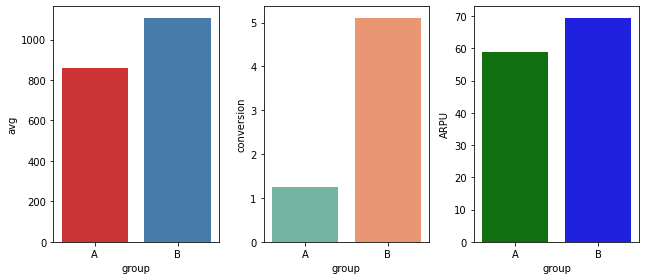

In [ ]:
def create_plots(avg, conv, arp):

    plt.subplot(1, 4, 1)
    sns.barplot(x='grp', y='avg', data=avg, palette='Set1')
    plt.xlabel('group')

    plt.subplot(1, 4, 2)
    sns.barplot(x='grp', y='conversion', data=conv, palette='Set2')
    plt.xlabel('group')

    plt.subplot(1, 4, 3)
    sns.barplot(x='grp', y='ARPU', data=arp, palette=['green', 'blue'])
    plt.xlabel('group')
    plt.tight_layout(rect=(0, 0, 2, 1))


create_plots(avg_values, conversion, ARPU)
plt.show()  # Для отображения графика